In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/engage-2-value-from-clicks-to-conversions/sample_submission.csv
/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv
/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv


In [2]:
import os
os.listdir()

['__notebook__.ipynb']

## Imports

In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import GradientBoostingRegressor, VotingRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.stats import randint, uniform
import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [4]:
df = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv") 
test_df=pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv")
sample_submission=pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/sample_submission.csv")
df.shape,test_df.shape,sample_submission.shape

((116023, 52), (29006, 51), (29006, 2))

In [5]:
df_copy=df.copy()
test_df_copy=test_df.copy()
df_copy.shape, test_df_copy.shape

((116023, 52), (29006, 51))

In [6]:
df_copy=df.copy()
test_df_copy=test_df.copy()
df_copy.shape, test_df_copy.shape

((116023, 52), (29006, 51))

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116023 entries, 0 to 116022
Data columns (total 52 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   trafficSource.isTrueDirect                    42890 non-null   object 
 1   purchaseValue                                 116023 non-null  float64
 2   browser                                       116023 non-null  object 
 3   device.screenResolution                       116023 non-null  object 
 4   trafficSource.adContent                       2963 non-null    object 
 5   trafficSource.keyword                         44162 non-null   object 
 6   screenSize                                    116023 non-null  object 
 7   geoCluster                                    116023 non-null  object 
 8   trafficSource.adwordsClickInfo.slot           4281 non-null    object 
 9   device.mobileDeviceBranding                   11

In [8]:
df.describe()

,purchaseValue,userId,gclIdPresent,sessionNumber,totals.visits,sessionId,trafficSource.adwordsClickInfo.page,pageViews,locationZone,totals.bounces,date,totalHits,sessionStart,new_visits
count,1.160230e+05,116023.000000,116023.000000,116023.000000,116023.0,1.160230e+05,4281.000000,116015.000000,116023.0,47148.0,1.160230e+05,116023.000000,1.160230e+05,80518.0
mean,2.656393e+07,61094.356231,0.037019,2.691311,1.0,1.493429e+09,1.019622,8.412352,8.0,1.0,2.016860e+07,10.607371,1.493429e+09,1.0
std,2.051825e+08,35240.756859,0.188808,10.451613,0.0,1.528798e+07,0.174517,14.344937,0.0,0.0,6.182322e+03,19.629576,1.528798e+07,0.0
min,0.000000e+00,0.000000,0.000000,1.000000,1.0,1.470035e+09,1.000000,1.000000,8.0,1.0,2.016080e+07,1.000000,1.470035e+09,1.0
25%,0.000000e+00,30603.500000,0.000000,1.000000,1.0,1.480066e+09,1.000000,1.000000,8.0,1.0,2.016112e+07,1.000000,1.480066e+09,1.0
50%,0.000000e+00,61014.000000,0.000000,1.000000,1.0,1.491646e+09,1.000000,2.000000,8.0,1.0,2.017041e+07,2.000000,1.491646e+09,1.0
75%,0.000000e+00,91616.500000,0.000000,2.000000,1.0,1.505079e+09,1.000000,10.000000,8.0,1.0,2.017091e+07,12.000000,1.505079e+09,1.0
max,2.312950e+10,122276.000000,1.000000,447.000000,1.0,1.525157e+09,5.000000,469.000000,8.0,1.0,2.018043e+07,500.000000,1.525157e+09,1.0


In [9]:
 #from sklearn.dummy import DummyRegressor 
#model = DummyRegressor().fit(X,y) 

In [10]:
#X_test = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv") 
#y_pred=model.predict(X_test) 
#submission = pd.DataFrame({"id": range(0,X_test.shape[0]), "purchaseValue": y_pred}) 
#submission.to_csv('submission.csv',index=False)

In [11]:
#df.shape, X.shape, y.shape

## EDA


In [12]:
df.head()

,trafficSource.isTrueDirect,purchaseValue,browser,device.screenResolution,trafficSource.adContent,trafficSource.keyword,screenSize,geoCluster,trafficSource.adwordsClickInfo.slot,device.mobileDeviceBranding,...,device.language,deviceType,userChannel,device.browserVersion,totalHits,device.screenColors,sessionStart,geoNetwork.continent,device.isMobile,new_visits
0,NaN,0.0,Edge,not available in demo dataset,NaN,NaN,medium,Region_2,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1500100799,Americas,False,1.0
1,True,0.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_3,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Direct,not available in demo dataset,1,not available in demo dataset,1495262065,Americas,False,1.0
2,True,0.0,Chrome,not available in demo dataset,NaN,(not provided),medium,Region_2,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Organic Search,not available in demo dataset,6,not available in demo dataset,1508510328,Europe,False,NaN
3,NaN,0.0,Internet Explorer,not available in demo dataset,NaN,NaN,medium,Region_4,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1483431838,Asia,False,1.0
4,True,88950000.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_3,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Direct,not available in demo dataset,66,not available in demo dataset,1475804633,Americas,False,1.0


#### Missing Values Analysis


In [13]:
missing_perc=df.isna().mean().sort_values(ascending=False)*100
missing_perc=missing_perc[missing_perc>0]
missing_perc

trafficSource.adContent                         97.446196
trafficSource.adwordsClickInfo.isVideoAd        96.310214
trafficSource.adwordsClickInfo.page             96.310214
trafficSource.adwordsClickInfo.adNetworkType    96.310214
trafficSource.adwordsClickInfo.slot             96.310214
trafficSource.referralPath                      63.184886
trafficSource.isTrueDirect                      63.033192
trafficSource.keyword                           61.936857
totals.bounces                                  59.363230
new_visits                                      30.601691
pageViews                                        0.006895
dtype: float64

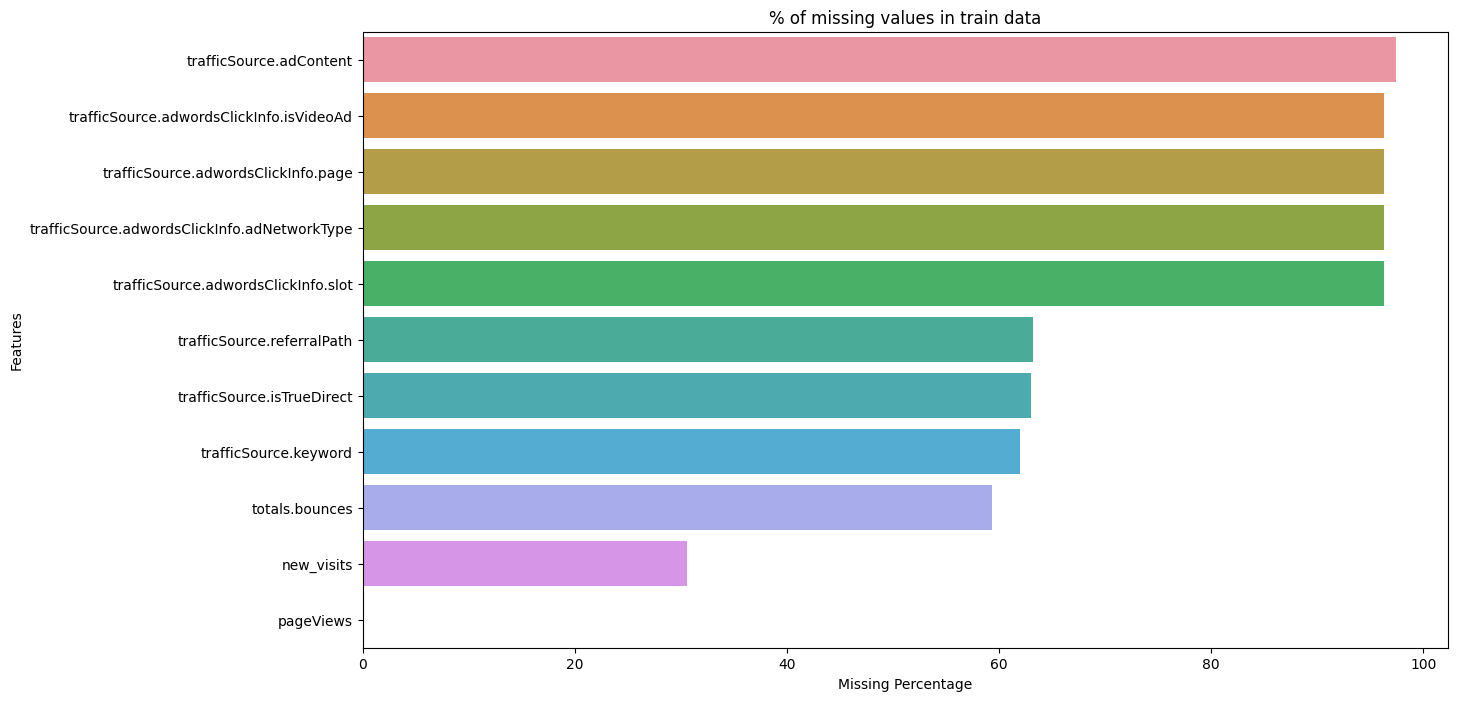

In [14]:
plt.figure(figsize=(14,8))
sns.barplot(x=missing_perc.values, y=missing_perc.index)
plt.title("% of missing values in train data")
plt.xlabel("Missing Percentage")
plt.ylabel("Features")
plt.show()

1. Missing Values: Many columns, such as trafficSource.adwordsClickInfo.slot and trafficSource.keyword, have a large number of missing values, indicating incomplete data for specific traffic sources or ad campaigns.

1. Zero Purchase Values: The purchaseValue column has zero values for many rows, suggesting a large number of users did not make any purchases.

#### Target varaible Analysis

In [15]:
print(df['purchaseValue'].describe())

count    1.160230e+05
mean     2.656393e+07
std      2.051825e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.312950e+10
Name: purchaseValue, dtype: float64


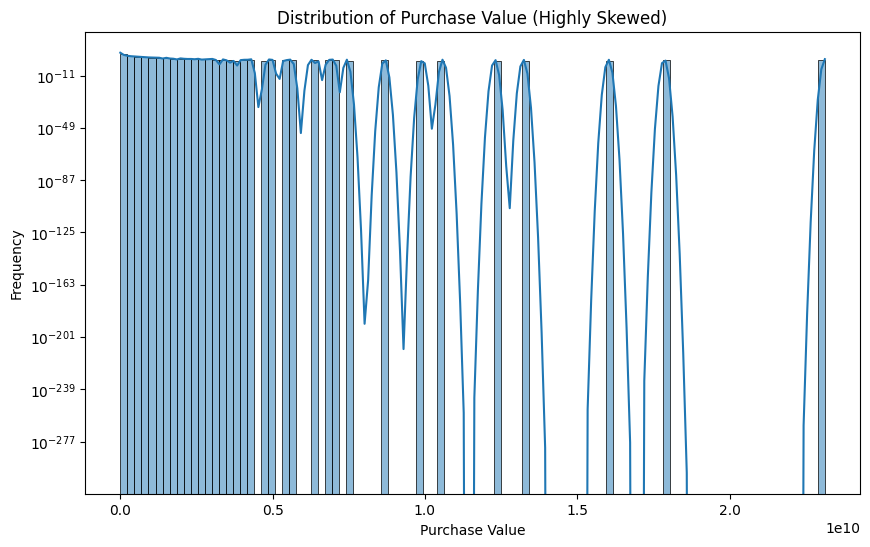

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df['purchaseValue'], bins=100, kde=True, log_scale=(False, True))
plt.title("Distribution of Purchase Value (Highly Skewed)")
plt.xlabel("Purchase Value")
plt.ylabel("Frequency")
plt.show()

1. Presence of Extreme Values: The graph shows a series of vertical spikes at very specific points, which could represent extreme or outlier values in the data. Most of the purchase values are clustered around zero, with some instances showing exceptionally high values, which makes the distribution highly skewed.

2. Zero or Minimal Purchases: The majority of the data points appear to have purchase values close to zero, suggesting that most users did not make any significant purchases. This could indicate that the dataset is imbalanced, with few transactions contributing disproportionately to the overall distribution

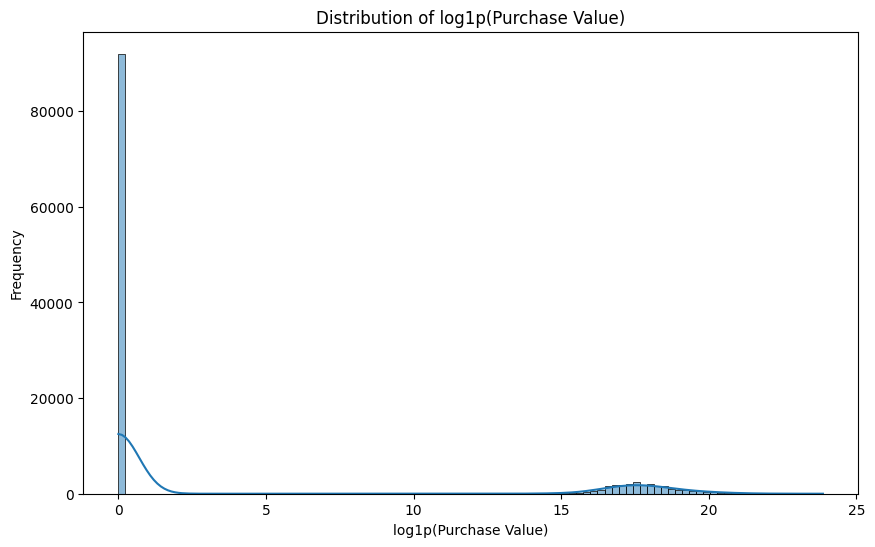

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(df['purchaseValue']), bins=100, kde=True)
plt.title("Distribution of log1p(Purchase Value)")
plt.xlabel("log1p(Purchase Value)")
plt.ylabel("Frequency")
plt.show()

1. Skew Reduction: The transformation (log1p) helps to reduce the extreme skewness observed in the original distribution. While there are still a few extreme values (with a tall spike near zero), the data now has a more spread-out appearance, making it easier to analyze.

2. Concentration Near Zero: A large portion of the data still concentrates near zero, indicating that many users are making no or very low-value purchases. However, the log-transformation smooths out the impact of these extreme zero-value entries, allowing you to focus better on the distribution of non-zero purchase values

In [18]:
zero_purchases = (df['purchaseValue'] == 0).sum()
print(f"Zero Purchase sessions: {zero_purchases} ({(zero_purchases / len(df)) * 100:.2f}%)")

Zero Purchase sessions: 92038 (79.33%)


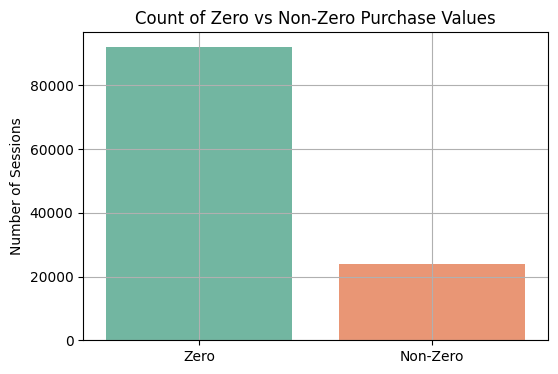

Zero Purchase sessions: 92038 (79.33%)
Actual Purchase sessions: 23985 (20.67%)


In [19]:
non_zero_count = (df['purchaseValue'] > 0).sum()

plt.figure(figsize=(6, 4))
sns.barplot(x=['Zero', 'Non-Zero'], y=[zero_purchases, non_zero_count], palette='Set2')
plt.title("Count of Zero vs Non-Zero Purchase Values")
plt.ylabel("Number of Sessions")
plt.grid(True)
plt.show()
print(f"Zero Purchase sessions: {zero_purchases} ({(zero_purchases / len(df)) * 100:.2f}%)")
print(f"Actual Purchase sessions: {non_zero_count} ({(non_zero_count / len(df)) * 100:.2f}%)")

1. Zero Purchase Values: The majority of the sessions (79.33%, or 92,038 sessions) have a purchase value of zero. This suggests that most users did not make a purchase or the data does not capture their purchases.

1. Non-Zero Purchase Values: Only 20.67% (23,895 sessions) of the sessions had a non-zero purchase value, indicating a much smaller fraction of users actually made purchases.

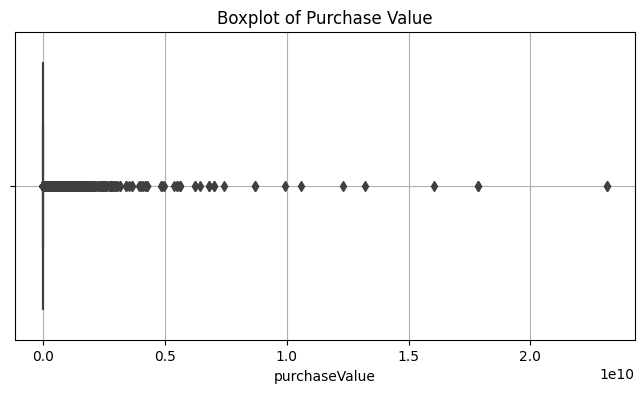

In [20]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['purchaseValue'])
plt.title("Boxplot of Purchase Value")
plt.xlabel("purchaseValue")
plt.grid(True)
plt.show()

1. Presence of Outliers: The plot shows a significant number of outliers on the higher end of the purchase value scale, indicating some extremely high purchase values. This is evident by the points that lie far outside the upper whisker of the boxplot, which could suggest a small number of users with extremely high purchase values.

2. Skewed Data: The majority of the data points are clustered near zero, which aligns with the observations from the previous charts. This shows that most sessions have zero or very low purchase values, while the extreme values are few but significantly higher.

#### Numerical Features Analysis


In [21]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns=['purchaseValue', 'userId', 'sessionId', 'sessionStart'])
numeric_cols.columns

Index(['gclIdPresent', 'sessionNumber', 'totals.visits',
       'trafficSource.adwordsClickInfo.page', 'pageViews', 'locationZone',
       'totals.bounces', 'date', 'totalHits', 'new_visits'],
      dtype='object')

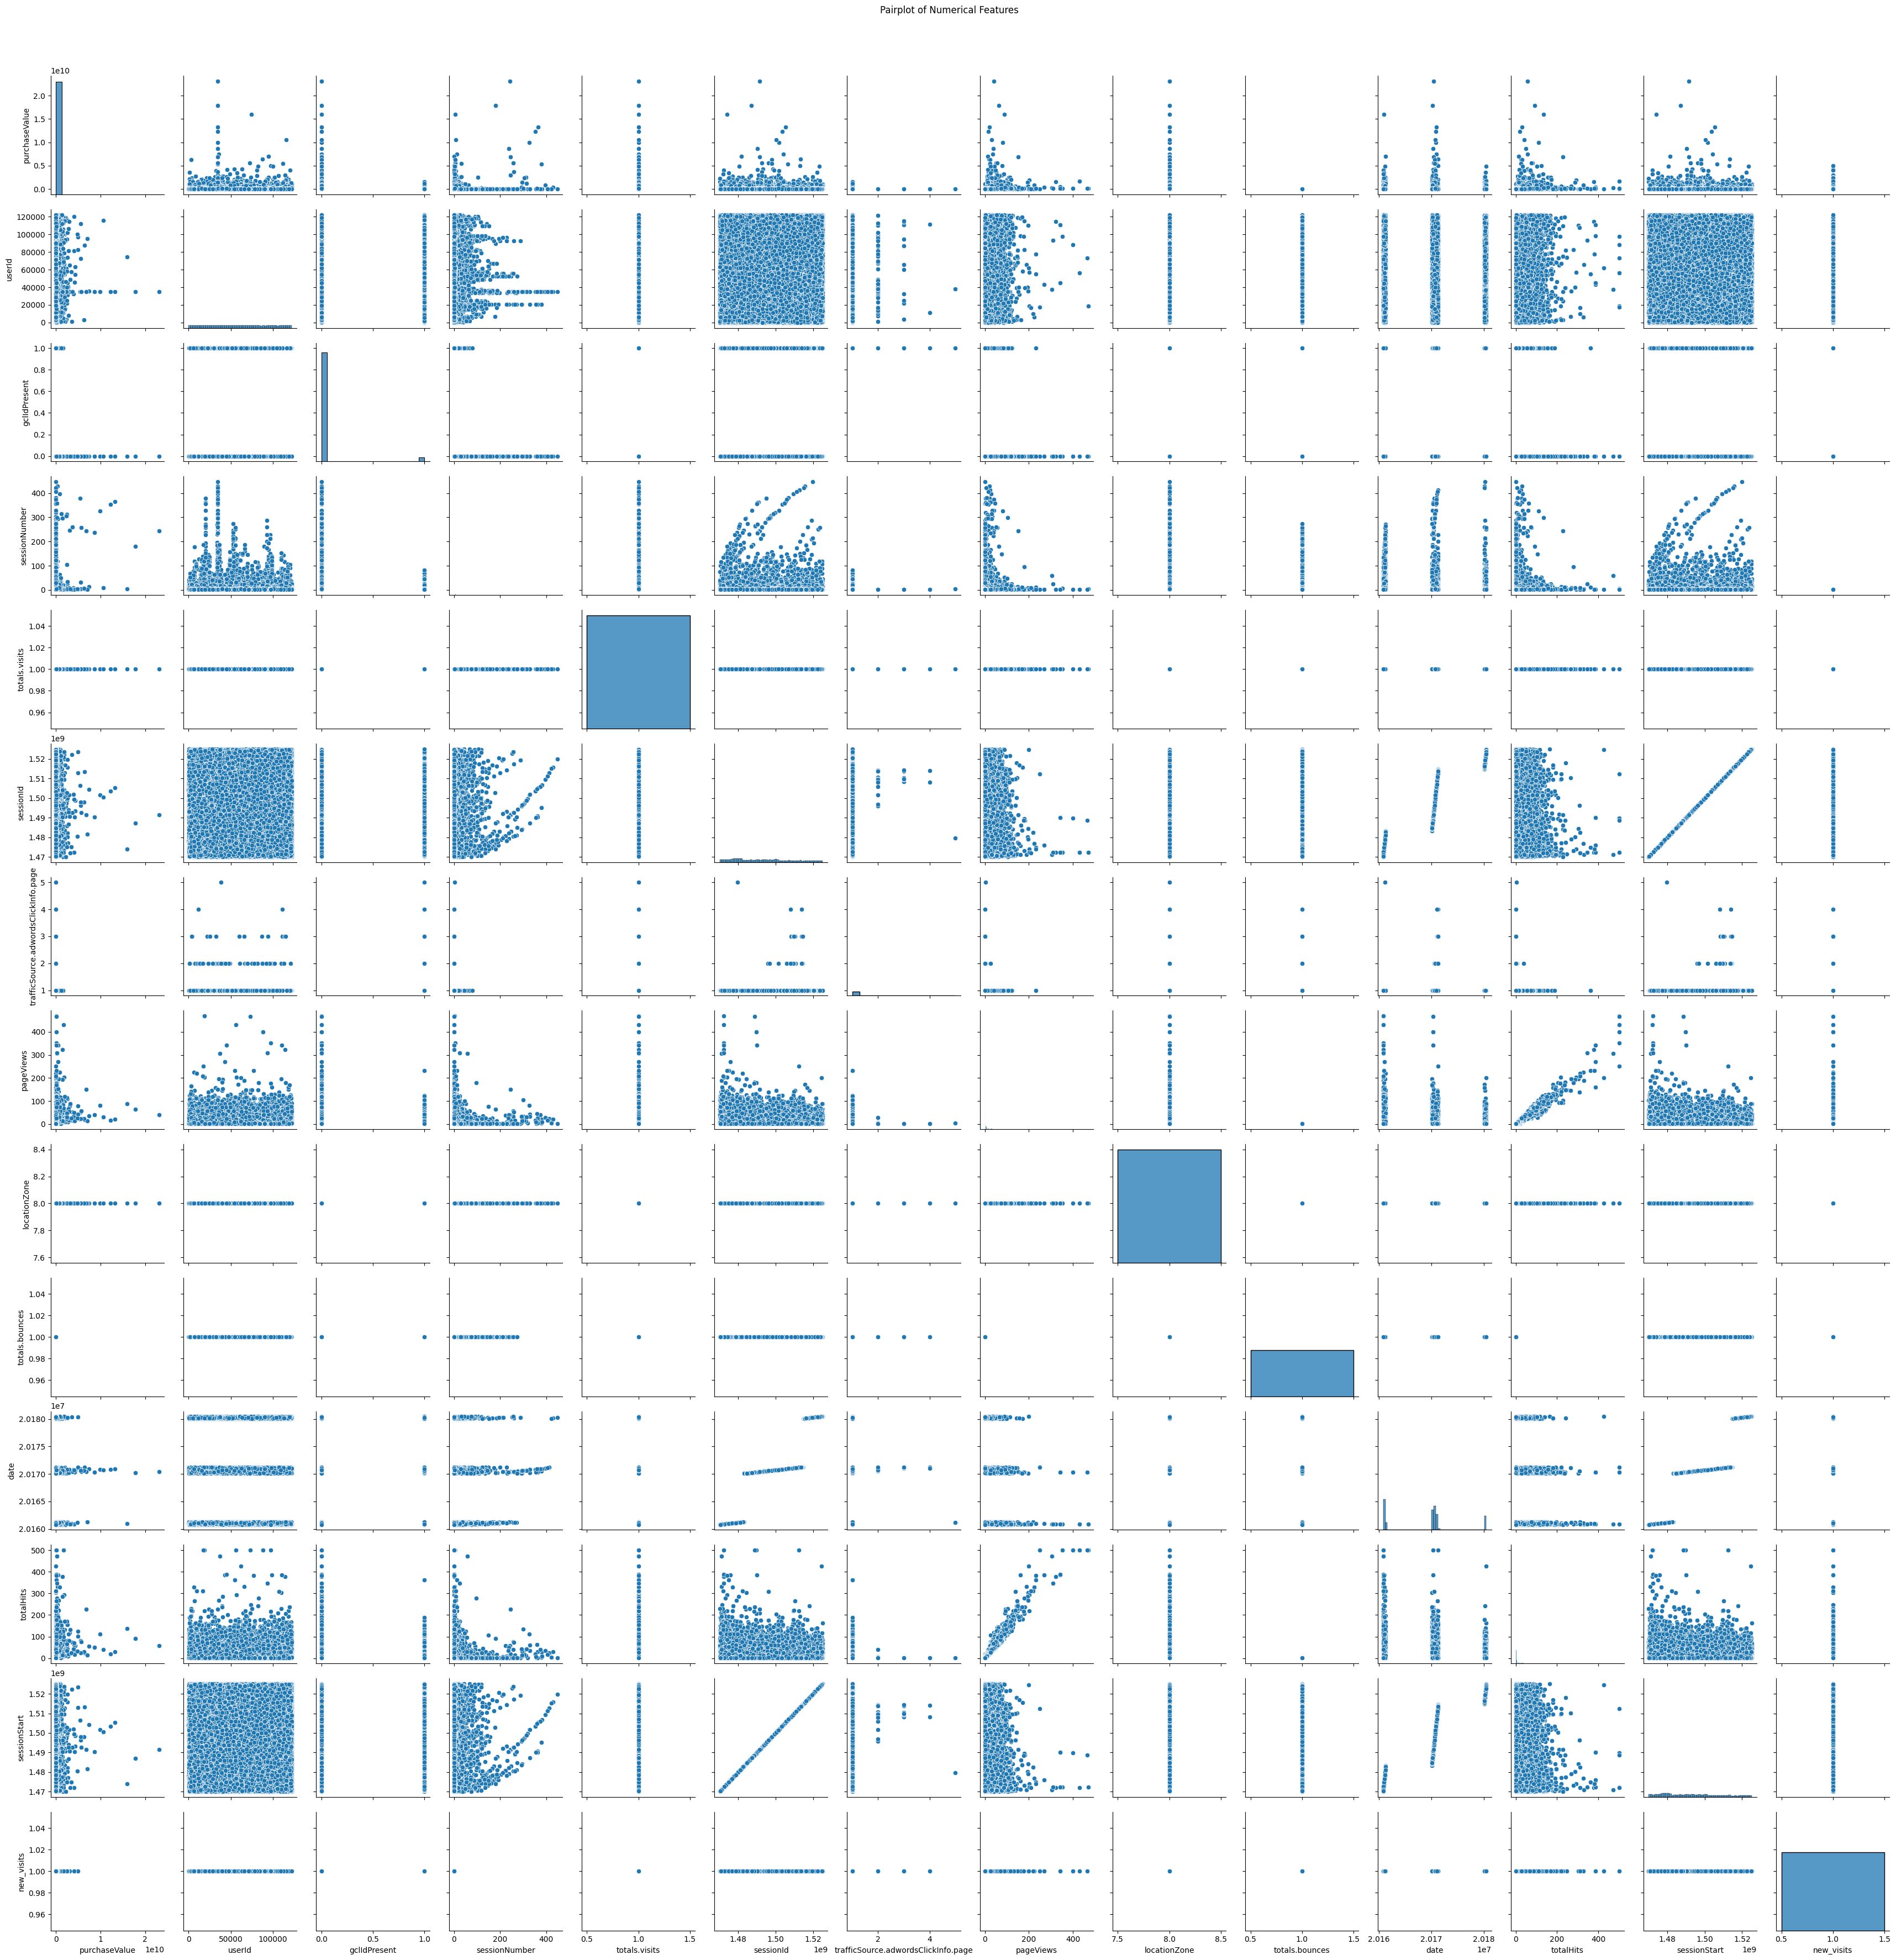

In [22]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
sns.pairplot(df[numerical_cols])
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

1. Scatterplots for Feature Relationships: A pairplot shows scatterplots for each pair of numerical features, helping identify correlations, trends, or patterns between them.

2. Feature Distributions: The diagonal of the pairplot displays the distribution of each individual feature, allowing you to assess their spread and skewness.

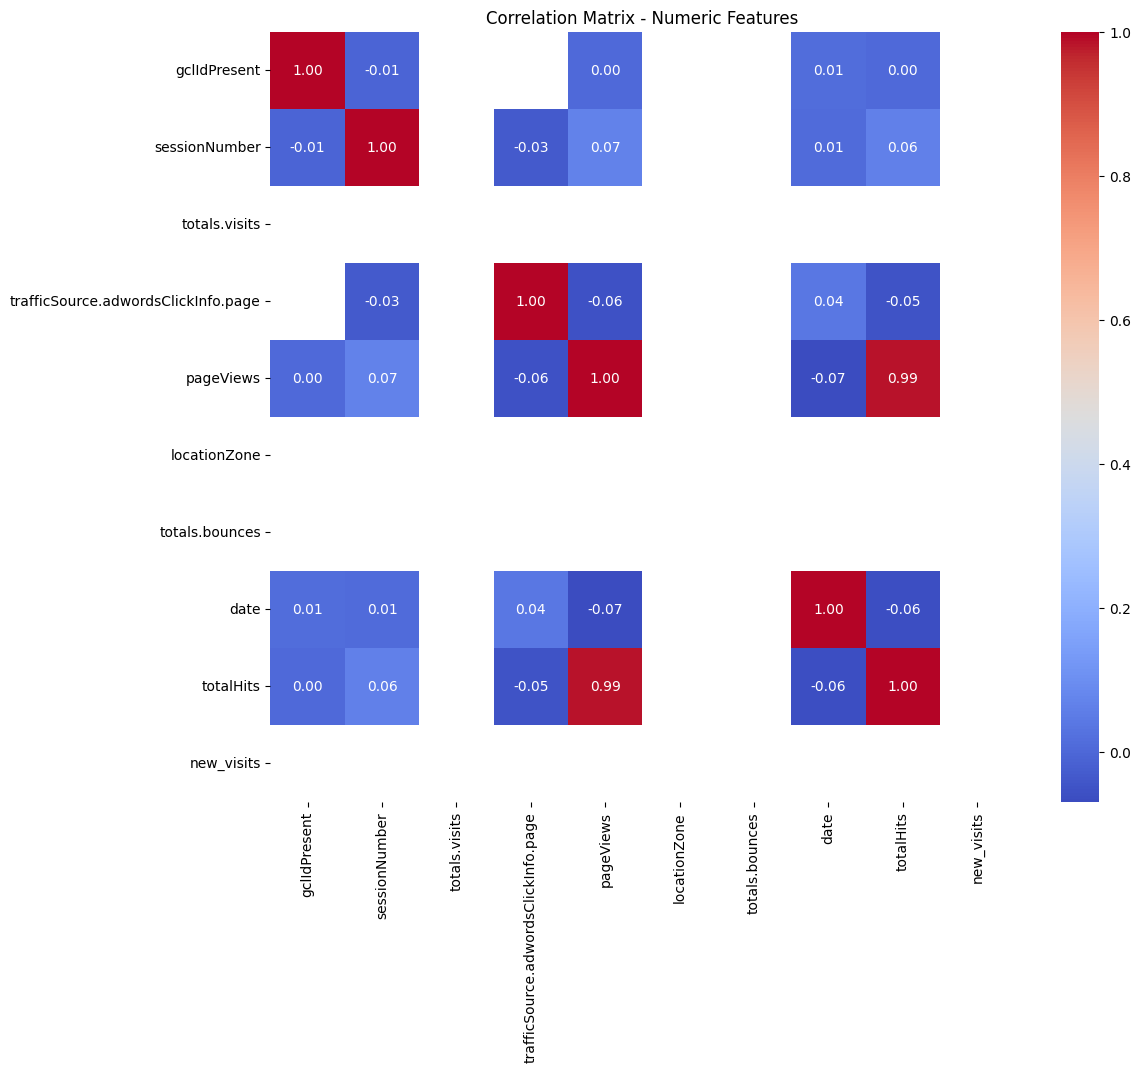

In [23]:
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_cols.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix - Numeric Features")
plt.show()

**1. Strong Correlations:**

totals.visits and totalHits show a high correlation (0.99), indicating that these two features likely follow similar patterns or represent related aspects of user activity.

pageViews and totalHits also show a strong correlation (0.99), suggesting that the number of page views is closely tied to the total hits during a session.

**2. Weak Correlations:**

Most other features, such as sessionNumber, new_visits, locationZone, and trafficSource.adwordsClickInfo.page, have weak correlations (close to 0) with other features. This indicates that these variables do not show strong relationships with one another in the context of the dataset.

**Insights**
These correlations provide valuable insights, especially for feature selection in machine learning models. we can consider removing highly correlated variables to reduce multicollinearity or focus on the ones that are more predictive.

#### Target value by High Page views

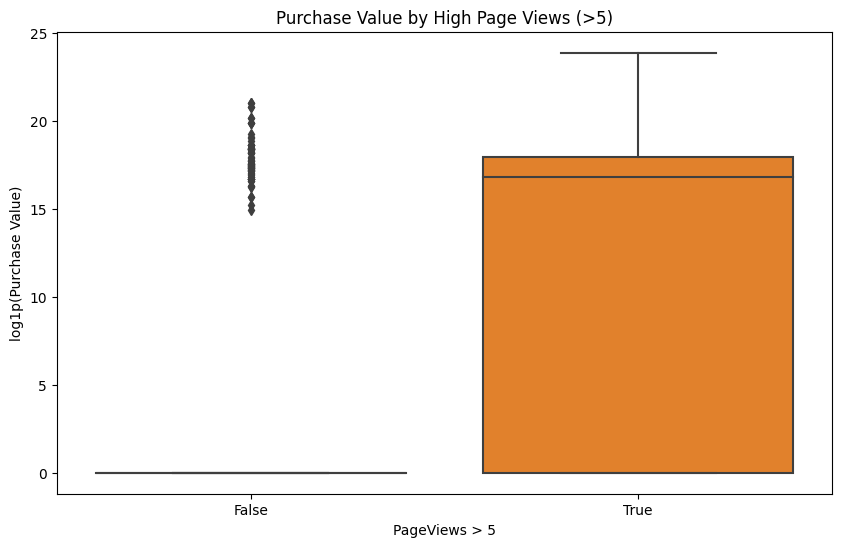

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=(df['pageViews'] > 5), y=np.log1p(df['purchaseValue']))
plt.title("Purchase Value by High Page Views (>5)")
plt.xlabel("PageViews > 5")
plt.ylabel("log1p(Purchase Value)")
plt.show()

**1.  High Purchase Value with High Page Views:**

* The boxplot shows that for sessions with more than 5 page views (True), the purchase values are generally higher and more spread out. The median is much higher compared to sessions with fewer than 5 page views.

* This indicates a positive relationship between page views and purchase value, suggesting that users who explore more pages tend to make higher-value purchases.

**2. Low or Zero Purchase Value with Low Page Views:**


* For sessions with fewer than 5 page views (False), most purchase values are close to zero or very low, with a few outliers.

* This suggests that users with fewer page views are less likely to make significant purchases, reinforcing the idea that higher engagement (measured by page views) might lead to more conversions or higher-value purchases.

#### Categorical Features Overview

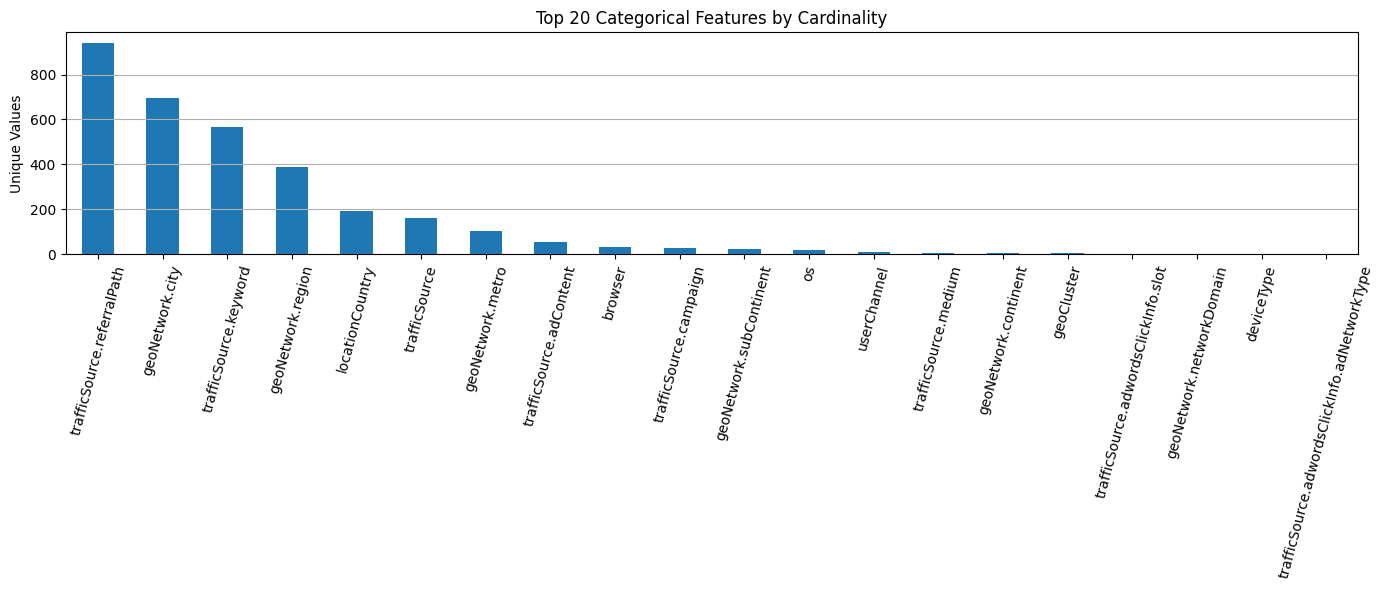

In [25]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
cardinality = df[cat_cols].nunique().sort_values(ascending=False)
plt.figure(figsize=(14, 6))
cardinality[:20].plot(kind='bar')
plt.title("Top 20 Categorical Features by Cardinality")
plt.ylabel("Unique Values")
plt.xticks(rotation=75)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

1. High Cardinality Features: trafficSource.referralPath has the most unique values (over 800), followed by geoNetwork.city and trafficSource.keyword, which may require special encoding techniques due to their large number of categories.

2. Low Cardinality Features: Features like geoCluster and deviceType have fewer unique values, making them simpler to handle and encode for modeling purposes.

In [26]:
cardinality

trafficSource.referralPath                      941
geoNetwork.city                                 695
trafficSource.keyword                           566
geoNetwork.region                               388
locationCountry                                 193
trafficSource                                   161
geoNetwork.metro                                104
trafficSource.adContent                          53
browser                                          34
trafficSource.campaign                           28
geoNetwork.subContinent                          23
os                                               18
userChannel                                       8
trafficSource.medium                              7
geoNetwork.continent                              6
geoCluster                                        5
trafficSource.adwordsClickInfo.slot               3
geoNetwork.networkDomain                          3
deviceType                                        3
trafficSourc

#### Feature Relationship

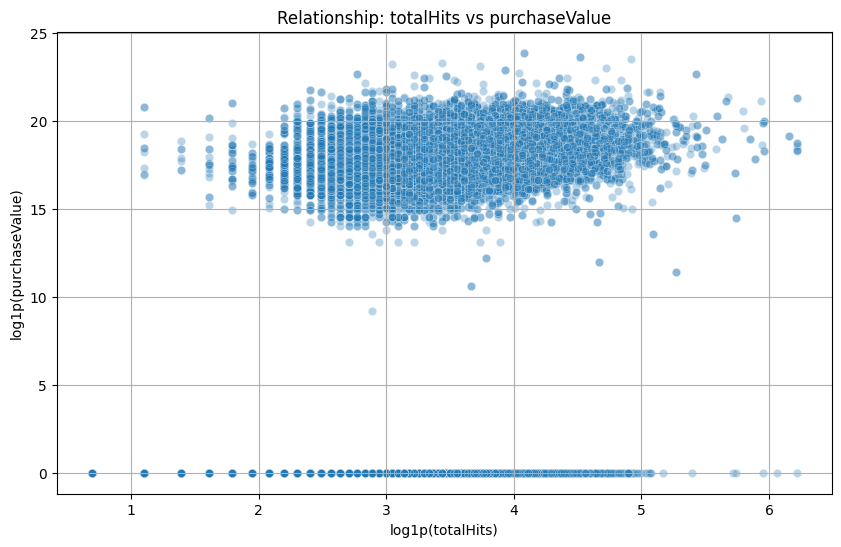

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=np.log1p(df['totalHits']), y=np.log1p(df['purchaseValue']), alpha=0.3)
plt.xlabel("log1p(totalHits)")
plt.ylabel("log1p(purchaseValue)")
plt.title("Relationship: totalHits vs purchaseValue")
plt.grid(True)
plt.show()

1. Weak Positive Correlation: There is a weak positive correlation between totalHits and purchaseValue. As the number of hits increases, there is a slight increase in the purchase value, but this relationship is not very strong.

2. Outliers and Dense Cluster: A significant number of points cluster near the lower values (log purchase values close to zero), indicating many sessions with low or no purchases. There are some outliers with very high purchase values, but they are sparse compared to the majority of the data.

#### Sessions by Country

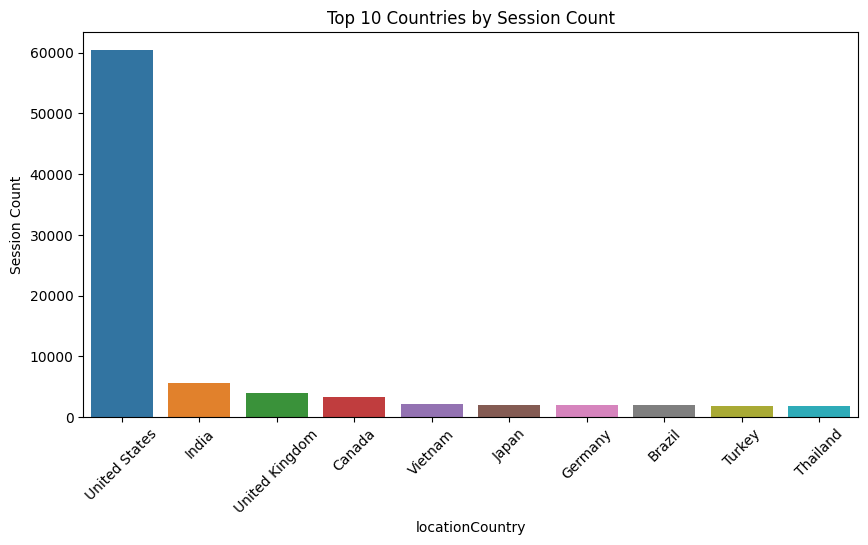

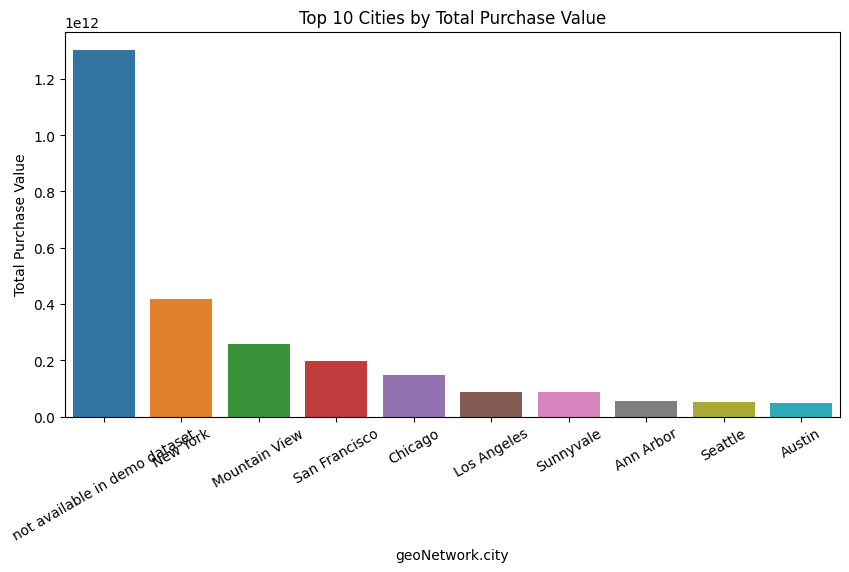

In [28]:
country_counts = df['locationCountry'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title("Top 10 Countries by Session Count")
plt.ylabel("Session Count")
plt.xticks(rotation=45)
plt.show()

# Top 10 cities by purchaseValue
top_cities = df.groupby('geoNetwork.city')['purchaseValue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_cities.index, y=top_cities.values)
plt.title("Top 10 Cities by Total Purchase Value")
plt.ylabel("Total Purchase Value")
plt.xticks(rotation=30)
plt.show()

1. Dominance of the United States: The United States has a significantly higher number of sessions (over 60,000) compared to the other countries, indicating that it is the dominant region for user sessions in this dataset.

2. Other Top Countries: After the United States, countries like India, United Kingdom, Canada, and Vietnam show much smaller session counts. This suggests that while the dataset has significant representation from various countries, the U.S. has a large concentration of user sessions.

## Preprocessing

#### Data Cleaning

In [29]:
# for col in df.select_dtypes(include=['object']).columns:
#     print(f"Frequency of categories in '{col}':")
#     print(df[col].value_counts(), "\n")

In [30]:
missing_markers = ["Unknown", "not available in demo dataset", "(not set)", "(not provided)"]
df.replace(missing_markers, np.nan, inplace=True)
test_df.replace(missing_markers, np.nan, inplace=True)

In [31]:
def drop_useless(df):
    missing_ratio = df.isna().mean()
    to_drop = missing_ratio[missing_ratio > 0.6].index.tolist()
    const_cols = [c for c in df.columns if df[c].nunique() <= 1]
    return df.drop(columns=list(set(to_drop + const_cols)), errors="ignore")

df = drop_useless(df)
test_df = drop_useless(test_df)

*Removing null values is important because:*

1. Improves Model Accuracy: Null values can distort the model's performance and lead to inaccurate predictions.

2. Prevents Errors: Many algorithms don’t work well with missing data and may fail or throw errors during training.

3. Ensures Clean Data: Handling null values ensures that the dataset is consistent and clean for better analysis.

####  Feature enginnering

In [32]:

for df_ in [df, test_df]:
    df_['sessionStart'] = pd.to_datetime(df_['sessionStart'], unit='ns', errors='coerce')
    df_['hour'] = df_['sessionStart'].dt.hour
    df_['dayofweek'] = df_['sessionStart'].dt.dayofweek
    df_['is_weekend'] = df_['dayofweek'].isin([5, 6]).astype(int)
    df_['hour_dayofweek'] = df_['hour'] * df_['dayofweek']
    df_['hits_per_pageview'] = df_['totalHits'] / (df_['pageViews'] + 1)
    df_['weekday_hour'] = df_['dayofweek'] * 24 + df_['hour']
    df_['page_per_hit'] = df_['pageViews'] / (df_['totalHits'] + 1)
    df_['hits_X_session'] = df_['totalHits'] * df_['sessionNumber']
    df_['is_morning'] = df_['hour'].between(5, 11).astype(int)

for dfs in [df, test_df]:
    dfs['date'] = pd.to_datetime(dfs['date'], format='%Y%m%d', errors='coerce')
    dfs['day_of_week'] = dfs['date'].dt.dayofweek      
    dfs['is_weekend_date'] = dfs['day_of_week'].isin([5,6]).astype(int)
    dfs['month'] = dfs['date'].dt.month
    dfs['day'] = dfs['date'].dt.day
    dfs['year'] = dfs['date'].dt.year
    dfs['quarter'] = dfs['date'].dt.quarter
    dfs['day_of_year'] = dfs['date'].dt.dayofyear

1. Improves Model Accuracy: Transformed features like hits_per_pageview and weekday_hour capture important patterns, helping the model make better predictions.

2. Prepares Data for Machine Learning: Feature engineering makes raw data more structured and meaningful, allowing models to learn from it more effectively.

#### More Feature interactions

In [33]:
# for dfs in [df, test_df]:

#     dfs['device_browser'] = dfs['deviceType'].astype(str) + '_' + dfs['browser'].astype(str)
#     dfs['continent_medium'] = dfs['geoNetwork.continent'].astype(str) + '_' + dfs['trafficSource.medium'].astype(str)
#     dfs['country_device'] = dfs['locationCountry'].astype(str) + '_' + dfs['deviceType'].astype(str)
#     dfs['region_weekday'] = dfs['geoNetwork.region'].astype(str) + '_' + dfs['dayofweek'].astype(str)
#     if 'geoNetwork.city' in dfs.columns:
#         dfs['city_hour'] = dfs['geoNetwork.city'].astype(str) + '_' + dfs['hour'].astype(str)
        

1. Captures Complex Relationships: Interactions between features help the model understand how multiple factors work together, leading to more accurate predictions.

2. Enhances Predictive Power: By combining features, the model can uncover patterns that might not be visible when looking at individual features, improving overall performance.

#### Handling unique identifiers

In [34]:
leak_cols = ['userId', 'sessionStart', 'visitId']
df.drop(columns=[col for col in leak_cols if col in df.columns], inplace=True)
test_df.drop(columns=[col for col in leak_cols if col in test_df.columns], inplace=True)

#### Outliners Remover

In [35]:
df = df[df['purchaseValue'] != df['purchaseValue'].max()]

#### Target Split

In [36]:
X = df.drop(columns=['purchaseValue'])
y = df['purchaseValue']
X_test = test_df.copy()

In [37]:
datetime_cols = X.select_dtypes(include=['datetime64[ns]']).columns.tolist()
X.drop(columns=datetime_cols, inplace=True)
X_test.drop(columns=datetime_cols, inplace=True)

In [38]:
X_test = X_test.reindex(columns=X.columns, fill_value=0)

#### Frequency mean encoding

In [39]:
cat_cols = X.select_dtypes(include='object').columns.tolist()
for col in cat_cols:
    mean_target = df.groupby(col)['purchaseValue'].mean()
    X[f'{col}.mean'] = X[col].map(mean_target)
    X_test[f'{col}.mean'] = X_test[col].map(mean_target).fillna(mean_target.mean())

    freq_encoding = X[col].value_counts(normalize=True)
    X[f'{col}.freq'] = X[col].map(freq_encoding)
    X_test[f'{col}.freq'] = X_test[col].map(freq_encoding).fillna(0)

X.drop(columns=cat_cols, inplace=True)
X_test.drop(columns=cat_cols, inplace=True)
X_test = X_test.reindex(columns=X.columns, fill_value=0)

1. Improves Model Performance:

      Mean encoding helps the model learn the relationship between categorical values and the target variable (purchaseValue). It captures information       about how each category affects the target.

      Frequency encoding provides additional information by representing the occurrence of categories, which can be valuable for some models,
      especially when there are many categories.

3. Handling Categorical Data:

      Machine learning models like decision trees, random forests, or linear regression cannot directly use categorical data in their raw form. These        encoding methods convert categorical data into numerical features, allowing models to interpret and use them effectively.

3. Data Consistency:

     By dropping the original categorical columns and ensuring that X_test has the same columns as X, the code ensures that both training and test   sets are consistent, avoiding errors when making predictions.

4. Avoiding Data Leakage:

    Using mean_target and freq_encoding only from the training data (df) ensures the model does not "see" the test data during training, preventing   data leakage.

#### Imputation and Scaling

In [40]:
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('scaler', StandardScaler())  
])
X_scaled = pipeline.fit_transform(X)
X_test_scaled = pipeline.transform(X_test)


1. Data Consistency:

     The pipeline ensures that the same preprocessing steps are applied to both the training and test data. This prevents discrepancies that could   arise if the transformations are applied separately.

2. Simplifies Workflow:

    By using a pipeline, all steps are bundled together, making the workflow cleaner and more modular. This reduces the chance of errors that might occur when applying transformations manually.

3.  Handles Missing Values:

     The SimpleImputer with most_frequent strategy ensures that any missing values in the data are filled with the most common value in each column, avoiding issues with models that cannot handle missing values.

4. Feature Scaling:

   StandardScaler ensures that all features are on the same scale. Without scaling, features with larger ranges might dominate the model's learning   
    process. This is especially important for algorithms that rely on distance calculations, like k-nearest neighbors or gradient-based algorithms like logistic regression.

In [41]:
X_scaled.shape

(116021, 48)

#### Feature selection

In [42]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
ridge = Ridge(alpha=1.0).fit(X_train, y_train)
selector = SelectFromModel(ridge, threshold='1.5*median', prefit=True)

X_train_sel = selector.transform(X_train)
X_val_sel = selector.transform(X_val)
X_test_sel = selector.transform(X_test_scaled)

print("Selected features:", X_train_sel.shape[1])

Selected features: 19


1. Feature Selection: It reduces model complexity by selecting only the most important features, improving performance and interpretability.

2. Prevents Overfitting: Ridge regression with regularization helps prevent overfitting by penalizing large coefficients, focusing on truly important features.

3. Efficient Data Usage: It ensures that the validation and test sets use the same selected features, making the model evaluation consistent and fair.

## Model Selection

#### Random Forest

 Random Forest is chosen for training because it handles complex relationships, reduces overfitting, and provides feature importance insights.

In [43]:
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=10, 
    min_samples_split=2, 
    min_samples_leaf=1,  
    random_state=42,
    n_jobs=-1 
)
rf.fit(X_train_sel, y_train)
val_preds = rf.predict(X_val_sel)
val_r2 = r2_score(y_val, val_preds)
print(f"Validation R2 with Random Forest: {round(val_r2, 5)}")

Validation R2 with Random Forest: 0.28809


Why random forest gave poor result?
1. Data Quality Issues: If there is noise, missing values, or outliers in the data, the model may struggle to make accurate predictions.
2. Overfitting: The model might be too complex, fitting noise in the training data, leading to poor generalization on validation data.

#### LightGBM

LightGBM is used for faster training and efficient handling of large datasets with high-dimensional features.

In [44]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(
    num_leaves=31,  
    learning_rate=0.05, 
    n_estimators=100,  
    max_depth=-1,  
    random_state=42,
    n_jobs=-1  
)
lgbm.fit(X_train_sel, y_train)
val_preds = lgbm.predict(X_val_sel)
val_r2 = r2_score(y_val, val_preds)
print(f"Validation R2 with LightGBM: {round(val_r2, 5)}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008024 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1749
[LightGBM] [Info] Number of data points in the train set: 92816, number of used features: 19
[LightGBM] [Info] Start training from score 25958953.535770
Validation R2 with LightGBM: 0.26388


**Why lightGBM yeild poor result?**
1. Model Complexity: LightGBM might not have captured the underlying patterns effectively due to its configuration, whereas XGBoost might have been better suited for the data's complexity.

2. Data Sensitivity: LightGBM and XGBoost have different strengths in handling various data types and characteristics. It's possible that XGBoost was better able to deal with the specific characteristics or noise in your datase

#### ADABoost

AdaBoost is chosen for its ability to boost weak learners' performance and effectively handle complex data by focusing on difficult-to-predict instances.

In [45]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score


ada = AdaBoostRegressor(n_estimators=50, random_state=42)


ada.fit(X_train_sel, y_train)


val_preds = ada.predict(X_val_sel)

val_r2 = r2_score(y_val, val_preds)
print(f"Validation R2 with AdaBoost: {round(val_r2, 5)}")

Validation R2 with AdaBoost: -10.44453


**Why Adaboost turned out to be the worst model?**

1. Sensitivity to Outliers: AdaBoost can be heavily influenced by outliers, which can lead to poor performance and a negative R² score.

2. Weak Base Estimators: If the base estimators are too weak for the dataset, AdaBoost struggles to make accurate predictions.

#### GradientBoostRegressor

Gradient Boosting is chosen for its  ability to capture non-linearity and robustness to overfitting with proper tuning.

In [46]:
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(X_train_sel, y_train)
val_preds = gbr.predict(X_val_sel)
val_r2 = r2_score(y_val, val_preds)
print(f"Validation R2 with GradientBoosting: {round(val_r2, 5)}")

Validation R2 with GradientBoosting: 0.22839


**Why it failed too?**

1. Data Sensitivity in GradientBoosting: Gradient Boosting may struggle with noisy or poorly preprocessed data, leading to suboptimal performance due to its sensitivity to outliers and lack of regularization compared to XGBoost.
   
1. Gradient Boosting’s Sensitivity to Feature Scaling: Gradient Boosting can be sensitive to the scale of the features, and if the data is not properly scaled or normalized, it can negatively impact performance, whereas XGBoost tends to be more robust to such issues.


#### XGBoost

XGBoost is chosen for its robustness to noisy data, ability to handle imbalances, and effectiveness with unscaled features, making it well-suited for this dataset.

In [47]:
xgb= XGBRegressor(n_estimators=1000,
                  learning_rate=0.05,
                  max_depth=10,
                  verbosity=0,
                  random_state=42)

xgb.fit(X_train_sel, y_train)
val_preds = xgb.predict(X_val_sel)
val_r2 = r2_score(y_val, val_preds)
print(f"Validation R2 with XGBoost: {round(val_r2, 5)}")

Validation R2 with XGBoost: 0.41596


#### *So best model turned out to be xgb with 0.41 r2 score on val set*

Why XGB turned out to be best model

1. Tree Pruning: XGBoost uses advanced tree pruning techniques (like max_depth) to prevent overfitting and enhance performance.

2. Handling Missing Data: XGBoost automatically handles missing values and can still perform well without requiring complex imputation, which is beneficial for datasets with missing or incomplete information.

## HyperParameter tuning of best model

In [48]:
# from sklearn.model_selection import RandomizedSearchCV
# from xgboost import XGBRegressor
# from scipy.stats import randint, uniform

# param_dist = {
#     'n_estimators': randint(700, 1400),
#     'learning_rate': uniform(0.03, 0.07),
#     'max_depth': randint(5, 12),
#     'subsample': uniform(0.8, 0.2),
#     'colsample_bytree': uniform(0.7, 0.3),
#     'reg_alpha': uniform(0, 1),
    
# }

# xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# random_search = RandomizedSearchCV(
#     estimator=xgb,
#     param_distributions=param_dist,
#     n_iter=25,  
#     scoring='r2',
#     cv=3,
#     verbose=2,
#     random_state=42,
#     n_jobs=-1
# )

# random_search.fit(X_train_sel, y_train)

# print("Best params:", random_search.best_params_)
# print("Best R2:", random_search.best_score_)

# best_xgb = random_search.best_estimator_

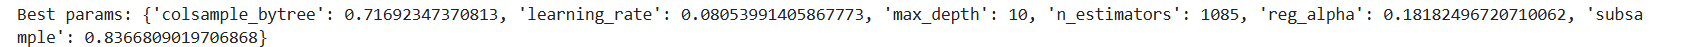

1. Improves Model Performance: Properly tuned hyperparameters can significantly enhance model accuracy by finding the best configuration for the algorithm and data.

2. Enhances Generalization: Tuning hyperparameters helps the model generalize better to unseen data, improving its performance on validation or test sets.

#### Tuned XGB

In [49]:
best_xgb = XGBRegressor(
    colsample_bytree=0.71692347370813,
    learning_rate=0.08053991405867773,
    max_depth=10,
    n_estimators=1085,
    reg_alpha=0.18182496720710062,
    subsample=0.8366809019706868,
    tree_method='hist',
    verbosity=0,
    random_state=42,
    n_jobs=2
)

best_xgb.fit(X_train_sel, y_train)

val_preds = best_xgb.predict(X_val_sel)
val_r2 = r2_score(y_val, val_preds)
print(f"Validation R2 with tuned XGBoost: {round(val_r2, 5)}")

Validation R2 with tuned XGBoost: 0.42338


## Final Prediction

In [50]:
# X_final = np.vstack([X_train_sel, X_val_sel])
# y_final = pd.concat([y_train, y_val])

# best_xgb.fit(X_final, y_final)
# final_preds = best_xgb.predict(X_test_sel)
# final_preds = np.clip(final_preds, 0, None)

# submission = pd.DataFrame({
#     "id": sample_submission['ID'],
#     "purchaseValue": final_preds
# })
# submission.to_csv("submission.csv", index=False)
# print("Submission saved")

#### Different encoding approach

In [51]:
# for df_ in [df_copy, test_df_copy]:
#     df_['sessionStart'] = pd.to_datetime(df_['sessionStart'], unit='ns', errors='coerce')
#     df_['hour'] = df_['sessionStart'].dt.hour
#     df_['dayofweek'] = df_['sessionStart'].dt.dayofweek
#     df_['is_weekend'] = df_['dayofweek'].isin([5, 6]).astype(int)
#     df_['hour_dayofweek'] = df_['hour'] * df_['dayofweek']
#     df_['hits_per_pageview'] = df_['totalHits'] / (df_['pageViews'] + 1)
#     df_['weekday_hour'] = df_['dayofweek'] * 24 + df_['hour']
#     df_['page_per_hit'] = df_['pageViews'] / (df_['totalHits'] + 1)
#     df_['hits_X_session'] = df_['totalHits'] * df_['sessionNumber']
#     df_['is_morning'] = df_['hour'].between(5, 11).astype(int)

In [52]:
# user_total = df_copy.groupby('userId')['purchaseValue'].sum().to_dict()
# user_count = df_copy.groupby('userId')['purchaseValue'].count().to_dict()

# for df_ in [df_copy, test_df_copy]:
#     df_['user_total_purchase'] = df_['userId'].map(user_total).fillna(0)
#     df_['user_purchase_count'] = df_['userId'].map(user_count).fillna(0)
#     df_['user_avg_purchase'] = df_['user_total_purchase'] / (df_['user_purchase_count'] + 1e-5)

In [53]:
# user_avg = df_copy.groupby('userId')['purchaseValue'].mean().to_dict()
# for df_ in [df_copy, test_df_copy]:
#     df_['user_avg_purchase'] = df_['userId'].map(user_avg)
#     df_['user_avg_purchase'] = df_['user_avg_purchase'].fillna(0)
# leak_cols = ['userId', 'sessionStart', 'visitId']
# df_copy.drop(columns=[col for col in leak_cols if col in df_copy.columns], inplace=True)
# test_df_copy.drop(columns=[col for col in leak_cols if col in test_df_copy.columns], inplace=True)

In [54]:
# df_copy = df_copy[df_copy['purchaseValue'] != df_copy['purchaseValue'].max()]

In [55]:
# y = df_copy['purchaseValue']
# X = df_copy.drop(columns=['purchaseValue'])

In [56]:
# icat_cols = X.select_dtypes(include='object').columns.tolist()

# for col in cat_cols:
#     target_mean = df_copy.groupby(col)['purchaseValue'].mean()
#     for df_, name in zip([X, test_df_copy], ['X', 'X_test']):
#         df_[f'{col}.mean'] = df_[col].map(target_mean)
#         df_[f'{col}.mean'] = df_[f'{col}.mean'].fillna(target_mean.mean())

In [57]:
# X.drop(columns=cat_cols, inplace=True)
# test_df_copy.drop(columns=cat_cols, inplace=True)

In [58]:
# test_df_copy = test_df_copy.reindex(columns=X.columns, fill_value=0)

In [59]:
# encoded_cols = [col for col in X.columns if col.endswith('.mean')]
# num_cols = [col for col in X.columns if col not in encoded_cols]

In [60]:
# num_pipe = Pipeline([
#     ('imputer', SimpleImputer(strategy='mean')),
#     ('scaler', StandardScaler())
# ])

# enc_pipe = Pipeline([
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('scaler', StandardScaler())
# ])

# preprocessor = ColumnTransformer([
#     ('num', num_pipe, num_cols),
#     ('enc', enc_pipe, encoded_cols)
# ])

In [61]:
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
# preprocess_select = Pipeline([
#     ('preprocess', preprocessor),
#     ('feature_selection', SelectFromModel(Ridge(alpha=1.0), threshold='1.5*median'))
# ])

# X_train_sel = preprocess_select.fit_transform(X_train, y_train)
# X_val_sel = preprocess_select.transform(X_val)

In [63]:
# param_dist = {
#     'n_estimators': randint(700, 1400),
#     'learning_rate': uniform(0.03, 0.07),
#     'max_depth': randint(5, 12),
#     'subsample': uniform(0.8, 0.2),
#     'colsample_bytree': uniform(0.7, 0.3),
#     'reg_alpha': uniform(0, 1),
# }

# xgb = XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)

# random_search = RandomizedSearchCV(
#     estimator=xgb,
#     param_distributions=param_dist,
#     n_iter=25,
#     scoring='r2',
#     cv=3,
#     verbose=2,
#     random_state=42,
#     n_jobs=-1
# )

# random_search.fit(X_train_sel, y_train)

# print("Best params:", random_search.best_params_)
# print("Best CV R2:", random_search.best_score_)

# best_xgb = random_search.best_estimator_

In [64]:
# final_pipeline = Pipeline([
#     ('preprocess', preprocessor),
#     ('feature_selection', SelectFromModel(Ridge(alpha=1.0), threshold='1.5*median')),
#     ('xgb', best_xgb)
# ])

In [65]:

# X_full = pd.concat([X_train, X_val])
# y_full = pd.concat([y_train, y_val])

# final_pipeline.fit(X_full, y_full)


# final_preds = final_pipeline.predict(test_df_copy)
# final_preds = np.clip(final_preds, 0, None)

# submission = pd.DataFrame({
#     "id": sample_submission['ID'],
#     "purchaseValue": final_preds
# })
# submission.to_csv("submission.csv", index=False)
# print("✅ Submission saved to submission.csv")


In [66]:
# from sklearn.datasets import load_iris

In [67]:
# iris=load_iris(as_frame=True)

In [68]:
# X=iris.data
# y=iris.target
# X.shape,y.shape

In [69]:
# df=X.copy()
# df['target']=y
# df.head()

In [70]:
# from sklearn.decomposition import PCA

In [71]:
# pca=PCA(n_components=2)
# pca.fit_transform(X)
# pca.explained_variance_ratio_.sum()

In [72]:

# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression

In [73]:
# lg=LogisticRegression()

In [74]:
# rfe=RFE(estimator=lg, n_features_to_select=2)

In [75]:
# X_rfe=rfe.fit_transform(X,y)
# rfe.support_

In [76]:
# rfe.ranking_[:2]